In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

pd.set_option('display.max_columns',None)

In [2]:
df=pd.read_csv('creditcard.csv')

In [5]:
df.head
df.shape
df.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [6]:
df.isnull().sum()/df.shape[0]

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

<Axes: >

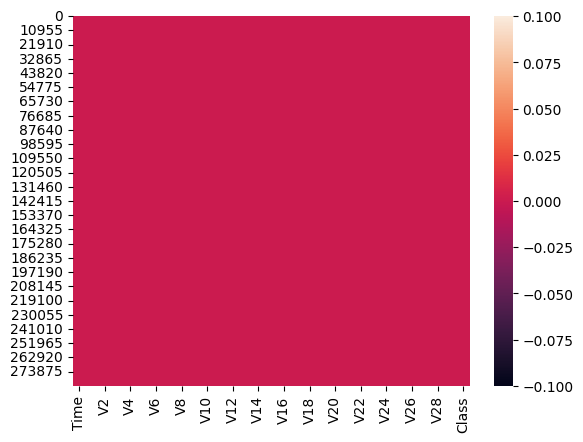

In [7]:
sns.heatmap(df.isnull())

In [8]:
df.duplicated().sum()

np.int64(1081)

In [9]:
df=df.drop_duplicates()

In [10]:
df.duplicated().sum()

np.int64(0)

In [12]:
df['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

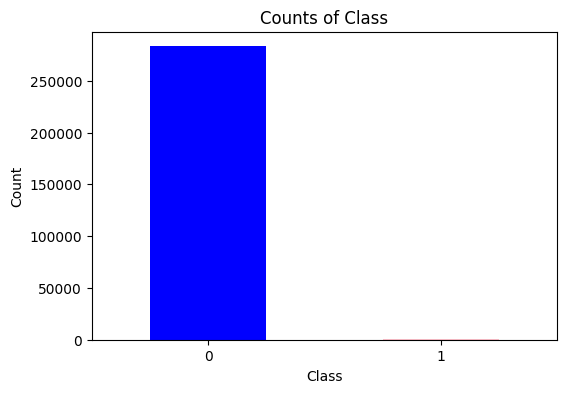

In [13]:
plt.figure(figsize=(6, 4))
df['Class'].value_counts().plot(kind='bar', color=['blue', 'pink'])
plt.title('Counts of Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [14]:
from sklearn.utils import resample
df_majority = df[(df['Class']==0)] 
df_minority = df[(df['Class']==1)] 

df_minority_upsampled = resample(df_minority, 
                                 replace=True,    
                                 n_samples= 271725, 
                                 random_state=42)  

df= pd.concat([df_minority_upsampled, df_majority])

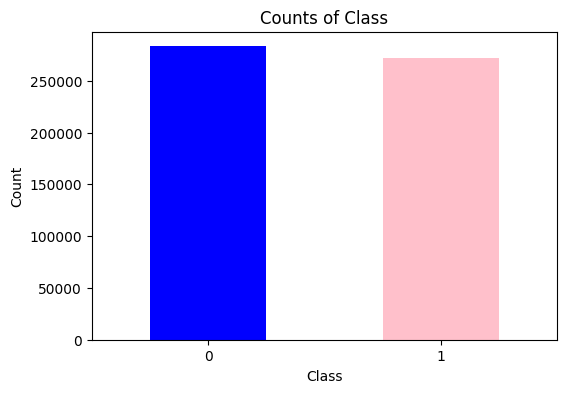

In [15]:
plt.figure(figsize=(6, 4))
df['Class'].value_counts().plot(kind='bar', color=['blue', 'pink'])
plt.title('Counts of Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [16]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33276,37167.0,-7.923891,-5.198360,-3.000024,4.420666,2.272194,-3.394483,-5.283435,0.131619,0.658176,-0.794994,3.266066,-2.719185,-0.124104,-5.274866,0.638575,-2.995830,-4.698433,-1.711871,3.025261,-2.169811,-0.734308,-0.599926,-4.908301,0.410170,-1.167660,0.520508,1.937421,-1.552593,12.31,1
249239,154309.0,-0.082983,-3.935919,-2.616709,0.163310,-1.400952,-0.809419,1.501580,-0.471000,1.519743,-1.134454,0.713878,0.979675,-1.339031,0.984993,-0.382471,-0.934616,-0.052419,0.511162,0.731999,1.878612,0.702672,-0.182305,-0.921017,0.111635,-0.071622,-1.125881,-0.170947,0.126221,1096.99,1
183106,125658.0,0.224414,2.994499,-3.432458,3.986519,3.760233,0.165640,1.099378,-0.654557,-2.435416,-2.276733,1.846079,-1.961195,-0.851166,-7.122316,1.019605,2.131015,6.443649,1.592538,-3.681904,-0.200846,0.491337,-0.984223,-0.421979,-1.048058,0.726412,0.268625,0.283689,0.419102,0.00,1
144108,85867.0,-3.586964,2.609127,-5.568577,3.631947,-4.543590,-0.157899,-4.089128,2.417305,-3.239901,-5.822449,3.369186,-5.691926,0.287371,-5.413787,-0.555550,-5.863662,-11.143241,-3.480940,2.794333,-0.178534,1.024423,0.428756,0.182032,-0.534598,0.168933,-0.149844,0.685517,-0.299728,310.42,1
41395,40662.0,-4.446847,-0.014793,-5.126307,6.945130,5.269255,-4.297177,-2.591242,0.342671,-3.880663,-3.976525,5.730084,-5.031868,-1.135439,-10.787051,0.265456,-1.104217,0.636413,0.994101,-0.688721,-0.108006,0.247913,-0.049586,-0.226017,-0.401236,0.856124,0.661272,0.492560,0.971834,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x = df.drop("Class", axis = 1).values
y = df['Class'].values

In [19]:
x_train,x_test ,y_train,y_test = train_test_split(x,y , test_size= 0.20 , random_state=42)

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
lr=LogisticRegression()

In [22]:
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
l

In [23]:
lr.score(x_train,y_train)*100

94.20674712037875

In [24]:
lr.score(x_test,y_test)

0.9437907672348553

In [29]:
import joblib
joblib.dump(lr,'model.pkl')
print("Model saved successfully")

Model saved successfully


In [25]:
pred=lr.predict(x_test)

In [26]:
from sklearn.metrics import classification_report

In [28]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     56628
           1       0.96      0.92      0.94     54368

    accuracy                           0.94    110996
   macro avg       0.94      0.94      0.94    110996
weighted avg       0.94      0.94      0.94    110996



In [30]:
predi = pd.DataFrame({'Y_Test': y_test,'Y_Pred':pred })
predi.head(7)

,Y_Test,Y_Pred
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
5,0,0
6,0,0
